<a href="https://colab.research.google.com/github/ReAlex1902/ML/blob/master/sem3/seminar_3_1_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<h3 style="text-align: center;"><b>Элементы теории оптимизации. Производные и частные производные.</b></h3>

<h3 style="text-align: center;"><b>Приращение линейной функции</b></h3>

Давайте рассмотрим линейную функцию $y=kx+b$ и построим график: <br>  

![source: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/c/c1/Wiki_slope_in_2d.svg) <br>  

Введём понятие **приращения** функции в точке $(x, y)$ как отношение вертикального изменения (измненеия функции по вертикали) $\Delta y$ к горизонтальному изменению $\Delta x$ и вычислим приращение для линейной функции:  

$$приращение ("slope")=\frac{\Delta y}{\Delta x}=\frac{y_2-y_1}{x_2-x_1}=\frac{kx_2+b-kx_1-b}{x_2-x_1}=k\frac{x_2-x_1}{x_2-x_1}=k$$  

Видим, что приращение в точке у прямой не зависит от $x$ и $\Delta x$.

<h3 style="text-align: center;"><b>Приращение произвольной функции</b></h3>

Но что, если функция не линейная, а произвольная $f(x)$?  
В таком случае просто нарисуем **касательную ** в точке, в которой ищем приращение, и будем смотреть уже на приращение касательной. Так как касательная - это прямая, мы уже знаем, какое у неё приращение (см. выше).
![source: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/d/d2/Tangent-calculus.svg)

Имея граик функции мы, конечно, можем нарисовать касательную в точке. Но часто функции заданы аналитически, и хочется уметь сразу быстро получать формулу для приращения функциии в точке. Тут на помощь приходит **производная**.  Давайте посмотрим на определение производной его с нашим понятием приращения:  

$$f'(x) = \lim_{\Delta x \to 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}$$  

То есть по сути, значение производной функции в точке - это и есть приращение функции, если мы стремим длину отрезка $\Delta x$ к нулю.

Посомтрим на интерактивное демо, демонстрирующее стремление $\Delta x$ к нулю (*в Google Colab работать не будет!*):

In [1]:
from __future__ import print_function

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pip install ipywidgets

In [3]:
@interact(lg_z=(-0.5,4.0,0.1))
def f(lg_z=1.0):
    z = 10 ** lg_z
    x_min = 1.5 - 6/z
    x_max = 1.5 + 6/z
    l_min = 1.5 - 4/z
    l_max = 1.5 + 4/z
    xstep = (x_max - x_min)/100
    lstep = (l_max - l_min)/100
    
    x = np.arange(x_min, x_max, xstep)
    
    plt.plot(x, np.sin(x), '-b')     
    
    plt.plot((l_min,l_max), (np.sin(l_min), np.sin(l_max)), '-r')
    plt.plot((l_min,l_max), (np.sin(l_min), np.sin(l_min)), '-r')
    plt.plot((l_max,l_max), (np.sin(l_min), np.sin(l_max)), '-r')
    
    yax = plt.ylim()    
    
    plt.text(l_max + 0.1/z, (np.sin(l_min) + np.sin(l_max)) / 2, "$\Delta y$")
    plt.text((l_min + l_max)/2, np.sin(l_min) - (yax[1]-yax[0]) / 20, "$\Delta x$")
    
    plt.show()
    
    print('slope =', (np.sin(l_max) - np.sin(l_min)) / (l_max - l_min))

interactive(children=(FloatSlider(value=1.0, description='lg_z', max=4.0, min=-0.5), Output()), _dom_classes=(…

Видим, что при уменьшении отрезка $\Delta x$, значение приращения стабилизируется (перестаёт изменяться). Это число и есть приращение функции в точке, равное проиводной функции в точке. Производную функции $f(x)$ в точке x обознают как $f'(x)$ или как $\frac{d}{dx}(f(x))$.  

<h3 style="text-align: center;"><b>Пример вычисления проиводной</b></h3>

Возьмём производную по определению:

1. $f(x)=x$  

$$\frac{\Delta y}{\Delta x}=\frac{x+\Delta x-x}{\Delta x}=1\Rightarrow \mathbf{\frac{d}{dx}(x)=1}$$  

2. $f(x)=x^2$  

$$\frac{\Delta y}{\Delta x}=\frac{(x+\Delta x)^2-x^2}{\Delta x}=\frac{x^2+2x\Delta x+\Delta x^2-x^2}{\Delta x}=2x+\Delta x\rightarrow 2x (\Delta x\rightarrow 0)\Rightarrow \mathbf{\frac{d}{dx}(x^2)=2x}$$  
    
3. В общем случае для степенной функции $f(x)=x^n$ формула будет такой:  

$$\mathbf{\frac{d}{dx}(x^n)=nx^{n-1}}$$  

<h3 style="text-align: center;"><b>Правила вычисления проиводной</b></h3>

Выпишет правила *дифференцирования*:  

1). Если $f(x)$ - константа, то её производная (приращение) 0:  

$$(C)' = 0$$

2). Производная суммы функций - это сумма производных:  

$$(f(x) + g(x))' = f'(x) + g'(x)$$

3). Производная разности - разность производных:  

$$(f(x) - g(x))' = f'(x) - g'(x)$$

4). Производная произведения функций:  

$$(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)$$

5). Производная частного:  

$$\left(\frac{f(x)}{g(x)}\right)'=\frac{f'(x)g(x)-g'(x)f(x)}{g^2(x)}$$

6). Производная сложной функции ("правило цепочки", "chain rule"):  

$$(f(g(x)))'=f'(g(x))g'(x)$$

Можно записать ещё так:  

$$\frac{d}{dx}(f(g(x)))=\frac{df}{dg}\frac{dg}{dx}$$

**Примеры**:

* Вычислим производную функции $$f(x) = \frac{x^2}{cos(x)} + 100$$:  

$$f'(x) = \left(\frac{x^2}{cos(x)}+100\right)' = \left(\frac{x^2}{cos(x)}\right)' + (100)' = \frac{(2x)\cos(x) - x^2(-\sin(x))}{cos^2(x)}$$

* Вычислим производную функции $$f(x) = tg(x)$$:  

$$f'(x) = \left(tg(x)\right)' = \left(\frac{\sin(x)}{\cos(x)}\right)' = \frac{\cos(x)\cos(x) - \sin(x)(-\sin(x))}{cos^2(x)} = \frac{1}{cos^2(x)}$$

<h3 style="text-align: center;"><b>Частные производные</b></h3>

Когда мы имеем функци многих переменных, её уже сложнее представить себе в виде рисунка (в случае более 3-х переменных это действительно не всем дано). ОДнако формальные правила взятия производной у таких функций созраняются. Они в точности совпадают с тоеми, которые рассмотрены выше для функции одной переменной.  

Итак, правило взятия частной производной функции мнгих переменных:  
1). Пусть $f(\overline{x}) = f(x_1, x_2, .., x_n)$ - функция многих переменных;  
2). Частная проиводная по $x_i$ это функции - это производная по x_i, считая все остальные переменные **константами**. 

Более математично:  

Частная производная функции $f(x_1,x_2,...,x_n)$ по $x_i$ равна  

$$\frac{\partial f(x_1,x_2,...,x_n)}{\partial x_i}=\frac{df_{x_1,...,x_{i-1},x_{i+1},...x_n}(x_i)}{dx_i}$$  

где $f_{x_1,...,x_{i-1},x_{i+1},...x_n}(x_i)$ означает, что переменные $x_1,...,x_{i-1},x_{i+1},...x_n$ - это фиксированные значения, и с ними нужно обращаться как с константами.

**Примеры**:   

* Найдём частные производные функции $f(x, y) = -x^7 + (y - 2)^2 + 140$ по $x$ и по $y$:  

$$f_x'(x, y) = \frac{\partial{f(x, y)}}{\partial{x}} = -7x^6$$  
$$f_y'(x, y) = \frac{\partial{f(x, y)}}{\partial{y}} = 2(y - 2)$$

* Найдём частные производные функции $f(x, y, z) = \sin(x)\cos(y)tg(z)$ по $x$, по $y$ и по $z$:  

$$f_x'(x, y) = \frac{\partial{f(x, y)}}{\partial{x}} = \cos(x)\cos(y)tg(z)$$  
$$f_y'(x, y) = \frac{\partial{f(x, y)}}{\partial{y}} = \sin(x)(-\sin(y))tg(z)$$
$$f_z'(x, y) = \frac{\partial{f(x, y)}}{\partial{y}} = \frac{\sin(x)\cos(y)}{\cos^2{z}}$$

<h3 style="text-align: center;"><b>Градиентный спуск</b></h3>

**Градиентом** функции $f(\overline{x})$, где $\overline{x} \in \mathbb{R^n}$, то есть $\overline{x} = (x_1, x_2, .., x_n)$, называется вектор из частных производных функции $f(\overline{x})$:  

$$grad(f) = \nabla f(\overline{x}) = \left(\frac{\partial{f(\overline{x})}}{\partial{x_1}}, \frac{\partial{f(\overline{x})}}{\partial{x_2}}, .., \frac{\partial{f(\overline{x})}}{\partial{x_n}}\right)$$

Есть функция $f(x)$. Хотим найти аргумент, при котором она даёт минимум.

Алгоритм градиентного спуска:  
1. $x^0$ - начальное значение (обычно берётся просто из разумных соображений или случайное);  
2. $x^i = x^{i-1} - \alpha \nabla f(x^{i-1})$, где $\nabla f(x^{i-1})$ - это градиент функции $f$, в который подставлено значение $x^{i-1}$;
3. Выполнять пункт 2, пока не выполнится условие остановки: $||x^{i} - x^{i-1}|| < eps$, где $||x^{i} - x^{i-1}|| = \sqrt{(x_1^i - x_1^{i-1})^2 + .. + (x_n^i - x_n^{i-1})^2}$.  

**Примеры:**

* *Пример 1*: Посчитаем формулу градиентного спуска для функции $f(x) = 10x^2$:   

$x^i = x^{i-1} - \alpha \nabla f(x^{i-1}) = x^{i-1} - \alpha f'(x^{i-1}) = x^{i-1} - \alpha (20x^{i-1})$

Имея эту формулу, напишем код градиентного спуска для функции $f(x) = 10x^2$:

In [4]:
import numpy as np
from tqdm import tqdm

def f(x):
    return 10 * x**2

def gradient_descent(alpha=0.001, eps=0.01):
    x_pred = 100  # начальная инициализация
    x = 50  # начальная инициализация
    for _ in tqdm(range(100000)):
        print(_)  # смотрим, на каком мы шаге
        if np.sum((x - x_pred)**2) < eps**2:  # условие остановки
            break
        x_pred = x
        x = x_pred - 20 * alpha * x_pred  # по формуле выше
    return x

In [5]:
x_min = gradient_descent()

  0%|          | 0/100000 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229


In [6]:
x_min

0.48948719814064656

In [7]:
f(x_min)

2.395977171435806

* *Пример 2*: Посчитаем формулу градиентного спуска для функции $f(x, y) = 10x^2 + y^2$:   

$$\left(\begin{matrix} x^i \\ y^i \end{matrix}\right) = \left(\begin{matrix} x^{i-1} \\ y^{i-1} \end{matrix}\right) - \alpha \nabla f(x^{i-1}, y^{i-1}) = \left(\begin{matrix} x^{i-1} \\ y^{i-1} \end{matrix}\right) - \alpha \left(\begin{matrix} \frac{\partial{f(x^{i-1}, y^{i-1})}}{\partial{x}} \\ \frac{\partial{f(x^{i-1}, y^{i-1})}}{\partial{y}} \end{matrix}\right) = x^{i-1} - \alpha \left(\begin{matrix} 20x^{i-1} \\ 2y^{i-1} \end{matrix}\right)$$

Осталось написать код, выполняющий градиентный спуск, пока не выполнится условие остановки, для функции $f(x, y) = 10x^2 + y^2$:

In [8]:
import numpy as np
from tqdm import tqdm

def f(x):
    return 10 * x[0]**2 + x[1]**2

def gradient_descent(alpha=0.01, eps=0.001):
    x_prev = np.array([100, 100])  # начальная инициализация
    x = np.array([50, 50])  # начальная инициализация
    for _ in tqdm(range(100000)):
        print(_)  # смотрим, на каком мы шаге
        if np.sum((x - x_prev)**2) < eps**2:  # условие остановки
            break
        x_prev = x
        x = x_prev - alpha * np.array(20 * x_prev[0], 2 * x_prev[1])  # по формуле выше
    return x

In [9]:
x_min = gradient_descent()

  0%|          | 0/100000 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [10]:
x_min

array([0.00272226, 0.00272226])

In [11]:
f(x_min)

8.151763082307056e-05

<h3 style="text-align: center;"><b>Домашнее задание</b></h3>

1). Вычислите производную функции $f(x)=\frac{1}{x}$ по определению и сравните с производной степенной функции в общем случае;  
2). Найдите производную функции $Cf(x)$, где С - число;  
3). Найдите производные функций:  

$$f(x)=x^3+3\sqrt{x}-e^x$$

$$f(x)=\frac{x^2-1}{x^2+1}$$

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

$$L(y, \hat{y}) = (y-\hat{y})^2$$  

4). Напишите формулу и код для градиентного спуска для функции:  
$$f(w, x) = \frac{1}{1 + e^{-wx}}$$  

То есть по аналогии с примером 2 вычислите частные производные по $w$ и по $x$ и запишите формулу векторно (см. пример 2)

В задаче 3 производную нужно брать по $\hat{y}$.

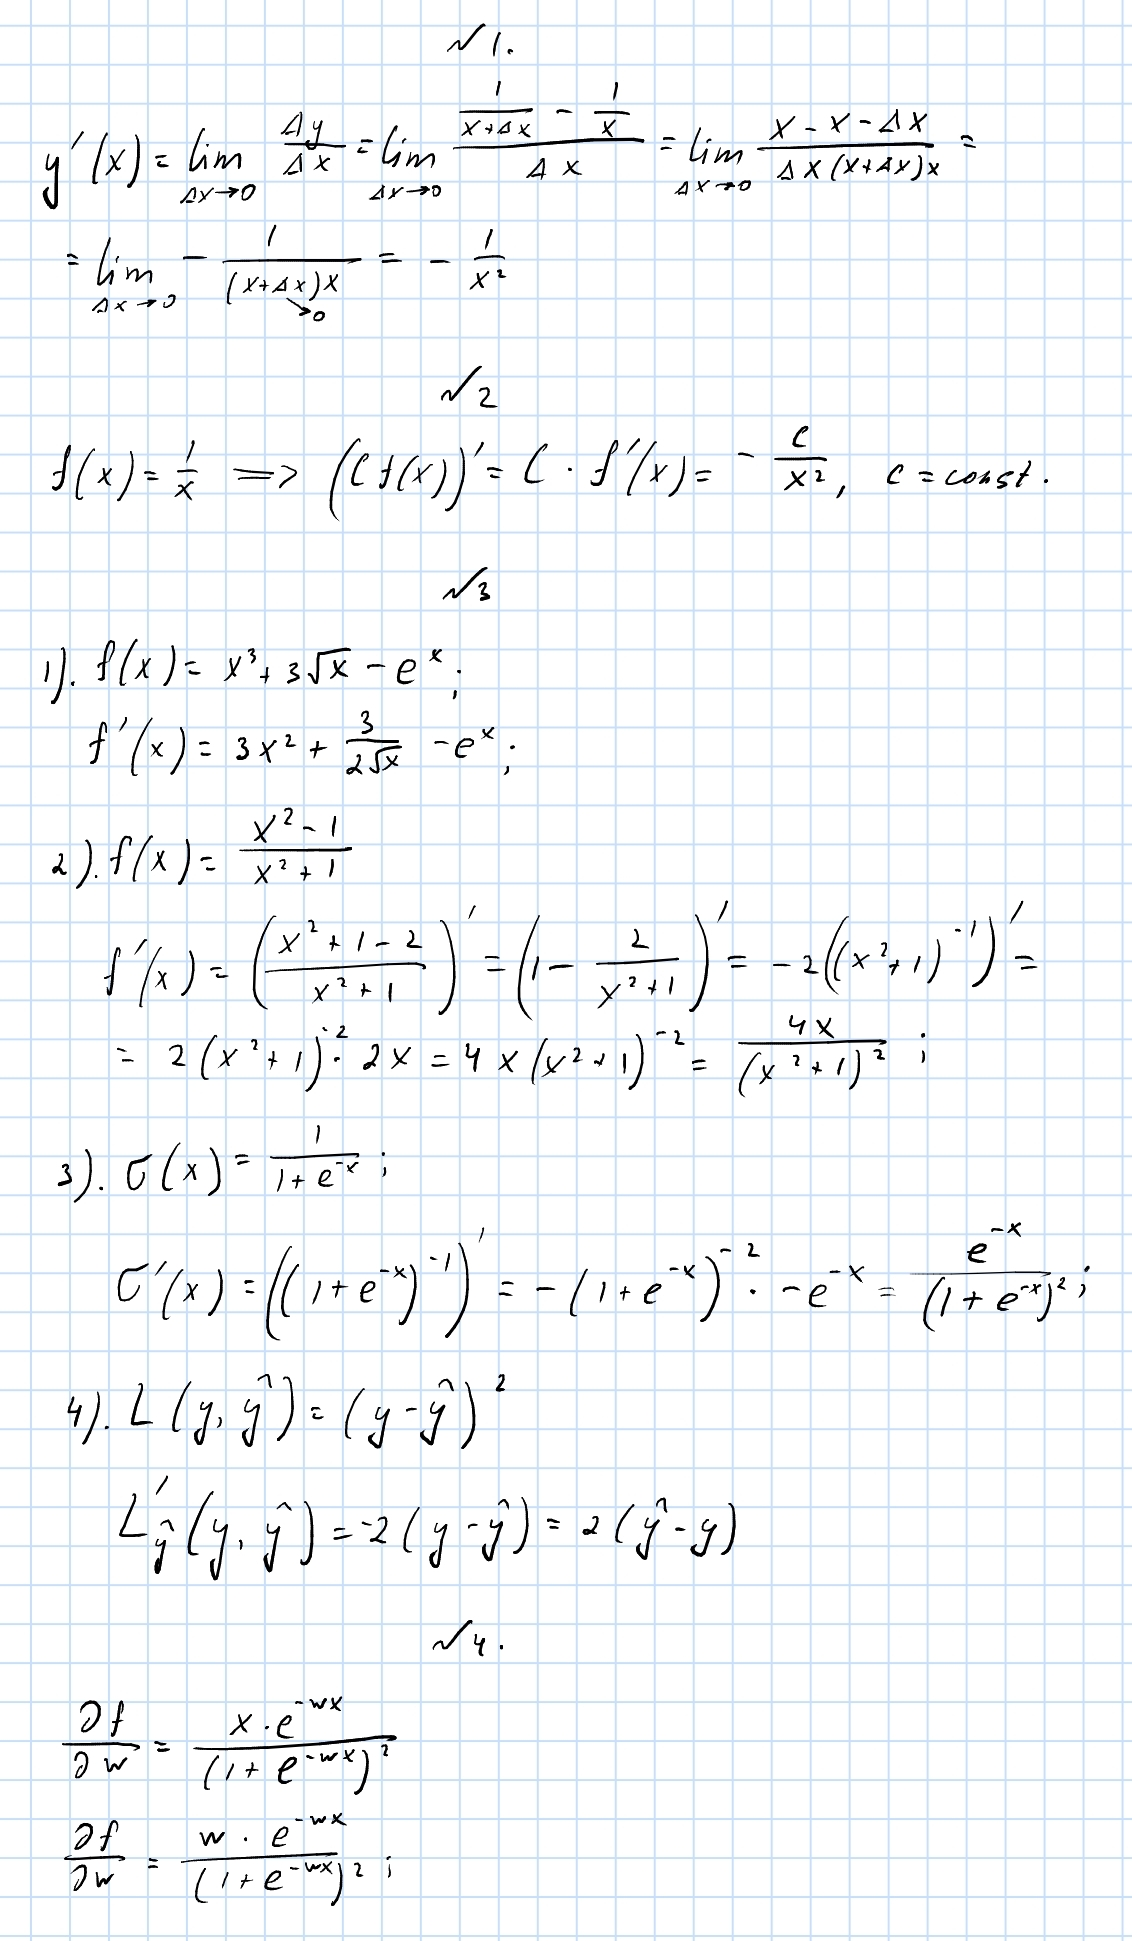

In [12]:
import numpy as np

def f(x):
    return 1 / (1 + np.exp(- x[0] * x[1]))

def gradient_descent(alpha=0.01, eps=0.001):
    x_prev = np.array([100, 100])  # начальная инициализация
    x = np.array([50, 50])  # начальная инициализация

    for i in range(100000):        
        loss = np.sum((x - x_prev)**2)
        print(f'Epoch: {i + 1}, Loss: {loss}')

        if loss < eps**2:  # условие остановки
            break

        x_prev = x
        # x = x_prev - alpha * np.array(20 * x_prev[0], 2 * x_prev[1])  # по формуле выше
        x = x_prev - alpha * np.array(x_prev[0] * np.exp(x_prev[1] * (-x_prev[0]))/((1 + np.exp(x_prev[1] * (-x_prev[0])))**2), 
                                      x_prev[1] * np.exp(x_prev[1] * (-x_prev[0]))/((1 + np.exp(x_prev[1] * (-x_prev[0])))**2))
    return x

x_min = gradient_descent()

Epoch: 1, Loss: 5000
Epoch: 2, Loss: 0.0


In [13]:
x_min

array([50., 50.])

In [14]:
f(x_min)

1.0

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

0). Прикольный сайт с рисунками путём задания кривых уравнениями и функциями:  

https://www.desmos.com/calculator/jwshvscdzb

***Производные:***

1). Про то, как брать частные производные:  

http://www.mathprofi.ru/chastnye_proizvodnye_primery.html

2). Сайт на английском, но там много видеоуроков и задач по производным:  

https://www.khanacademy.org/math/differential-calculus/derivative-intro-dc

3). Задачи на частные производные:  

http://ru.solverbook.com/primery-reshenij/primery-resheniya-chastnyx-proizvodnyx/  

4). Ещё задачи на частные проивзодные:  

https://xn--24-6kcaa2awqnc8dd.xn--p1ai/chastnye-proizvodnye-funkcii.html  

5). Производные по матрицам:  

http://nabatchikov.com/blog/view/matrix_der  

***Градиентны спуск:***

6). [Основная статья по градиентному спуску](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)

7). Статья на Хабре про градиетный спуск для нейросетей:  

https://habr.com/post/307312/  

***Методы оптимизации в нейронных сетях:***

8). Сайт с анимациями того, как сходятся алгоритмы градиентного спуска:
www.denizyuret.com/2015/03/alec-radfords-animations-for.html

9). Статья на Хабре про метопты (град. спуск) в нейронках:
https://habr.com/post/318970/

10). Ещё сайт (англ.) про метопты (град. спуск) в нейронках (очень подробно):
http://ruder.io/optimizing-gradient-descent/